In [1]:
### for 80mpc box
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.interpolate as interp
import scipy as sp
import re
from sklearn.neighbors import KDTree
import pickle as pickle
import random

#galaxy Mvir, x,y,z, vx, vy, vz
gals = np.loadtxt('hpropsRS.res', usecols=[5,6,7],unpack=1) 
# setting vx, vy, vz to be 0, so the position is in real space, to match the v=0 LOS



In [2]:
with open('a_lyman_limited_value.pkl', 'rb') as f:
    lyman = pickle.load(f)

In [3]:
lyman[0][0][4]

[2.005363879937967, 12.166111410859045, 25.194943977006197]

In [4]:
def nns(points,lyman_limited_value,k_points):
    tree = KDTree(points)
    #all_nn_indices = tree.query_radius(points, r = 1)
    nearest_dist, all_nn_indices = tree.query(points, k=k_points)
    nns = []
    for i in range(len(all_nn_indices)-len(lyman_limited_value),len(all_nn_indices)):
        nns.append(all_nn_indices[i])
    all_nns = [
        [points[idx] for idx in nn_indices if idx != int(i+len(all_nn_indices)-len(lyman_limited_value))]
        for i, nn_indices in enumerate(nns)
    ]
    neighbors = []
    for nns in all_nns:
        neighbors.append(nns)
    all_distance_diff = []
    temp_distance = [neighbors[0][0]]
    for i,k in zip(neighbors,lyman_limited_value):
        all_distance_diff.append(temp_distance)
        temp_distance = []
        for ii in i:
                temp_distance.append(np.sqrt((ii[0]-k[0])**2+(ii[1]-k[1])**2+(ii[2]-k[2])**2))
    plot_data  = []
    for i in all_distance_diff:
        for k in i:
            plot_data.append(k)
    counts,bins = np.histogram(plot_data,bins=100)
    total = np.sum(counts)
    probability = []
    for i in range(len(counts)):
        probability.append(counts[i]/total)
    cumulative_probability = []
    cumulative_probability.append(probability[0])
    for i in range(1,len(probability)):
        cumulative_probability.append(probability[i]+cumulative_probability[i-1])
    cumulative_probability
    return cumulative_probability,counts,bins

In [5]:
lyman_limited_value = []
for i in lyman:
    for k in i:
        lyman_limited_value.append(k[4])

In [6]:
#need the change this to iterate through individual lls instead of the whole thing
points = []
for i,j,k in zip(gals[0],gals[1],gals[2]):
    points.append([i,j,k])
for z in lyman_limited_value:
    points.append(z)

In [7]:
len(lyman_limited_value)

1273

In [8]:
def generate_random_location():
    non_lyman_limited_value = []
    for i in range(0,200):
        value = random.random()*40
        value1 =  random.random()*40
        value2 =  random.random()*40
        non_lyman_limited_value.append([value,value1,value2])
    return non_lyman_limited_value

In [10]:
non_lyman_limited_value = generate_random_location()


In [11]:

points = []
for i,j,k in zip(gals[0],gals[1],gals[2]):
    points.append([i,j,k])
for z in lyman_limited_value:
    points.append(z)
cumulative_probability,counts, bins  = nns(points,lyman_limited_value,2)

points = []
for i,j,k in zip(gals[0],gals[1],gals[2]):
    points.append([i,j,k])
for z in lyman_limited_value:
    points.append(z)
cumulative_probability1,counts, bins1  = nns(points,lyman_limited_value,3)

points = []
for i,j,k in zip(gals[0],gals[1],gals[2]):
    points.append([i,j,k])
for z in lyman_limited_value:
    points.append(z)
cumulative_probability2,counts, bins2  = nns(points,lyman_limited_value,4)

points = []
for i,j,k in zip(gals[0],gals[1],gals[2]):
    points.append([i,j,k])
for z in non_lyman_limited_value:
    points.append(z)
cumulative_probability3,counts, bins3  = nns(points,non_lyman_limited_value,2)

points = []
for i,j,k in zip(gals[0],gals[1],gals[2]):
    points.append([i,j,k])
for z in non_lyman_limited_value:
    points.append(z)
cumulative_probability4,counts, bins4  = nns(points,non_lyman_limited_value,3)

points = []
for i,j,k in zip(gals[0],gals[1],gals[2]):
    points.append([i,j,k])
for z in non_lyman_limited_value:
    points.append(z)
cumulative_probability5,counts, bins5  = nns(points,non_lyman_limited_value,4)

In [12]:
def plot_value(cumulative_probability):
    plot_value = []
    cumulative_probability_minus = np.subtract(1,cumulative_probability)
    count = 0
    i = cumulative_probability[count]
    k = cumulative_probability_minus[count]
    while(k>i):
        plot_value.append(i)
        count+=1
        i= cumulative_probability[count]
        k =  cumulative_probability_minus[count]
    while(count < len(cumulative_probability)):
        plot_value.append(cumulative_probability_minus[count])
        count+=1
    return plot_value

plotting = plot_value(cumulative_probability)
plotting1 = plot_value(cumulative_probability1)
plotting3 = plot_value(cumulative_probability3)
plotting4 = plot_value(cumulative_probability4)

/tmp/ipykernel_12309/1717148139.py:2: RuntimeWarning: invalid value encountered in log10
  plt.plot(x,np.log10(plotting),label = str(5-1)+"nns",c="green")
/tmp/ipykernel_12309/1717148139.py:6: RuntimeWarning: invalid value encountered in log10
  plt.plot(x, np.log10(plotting3),label = str(5-1)+"nns",c="black")


(-2.0, 0.0)

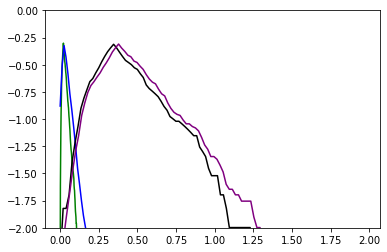

In [14]:
x = np.linspace(0,bins[-1] ,100)
plt.plot(x,np.log10(plotting),label = str(5-1)+"nns",c="green")
x = np.linspace(0,bins1[-1] ,100)
plt.plot(x,np.log10(plotting1),label = str(5-1)+"nns",c="blue")
x = np.linspace(0,bins3[-1] ,100)
plt.plot(x, np.log10(plotting3),label = str(5-1)+"nns",c="black")
x = np.linspace(0,bins4[-1] ,100)
plt.plot(x, np.log10(plotting4),label = str(5-1)+"nns",c="purple")
plt.ylim(-2,0)
